<a href="https://colab.research.google.com/github/xknobm00/MPA-MLF/blob/main/CV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [18]:
import numpy as np
# Defined 3 points in 2D-space:
X=np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X,X.T)/3
print(R)
# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]
#print(u1)
#print(u2)

# Calculate the coordinates in new orthonormal basis:
Xi1 = np.matmul(np.transpose(X),u1)
Xi2 = np.matmul(np.transpose(X),u2)
#prinnt(Xi1)
#prinnt(Xi2)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
Xaprox = np.matmul(u1[:,None],Xi1[None,:]) +np.matmul(u2[:,None],Xi2[None,:])
print(Xaprox)

# Check that you got the original

[[1.66666667 3.66666667]
 [3.66666667 8.33333333]]
[[2. 1. 0.]
 [4. 3. 0.]]


## PCA on Iris data

In [19]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

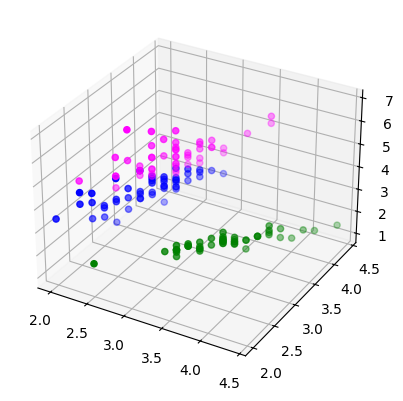

In [20]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show

[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]


array([0.23245325, 0.0324682 , 0.00959685])

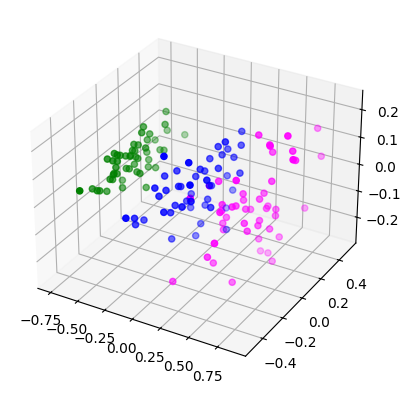

In [38]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Xscaler = StandardScaler()
Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)


from sklearn import decomposition

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)
print(pca.get_covariance())

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show
pca.explained_variance_

In [39]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([0.23245325, 0.0324682 , 0.00959685])

In [40]:
pca.explained_variance_ratio_

array([0.84136038, 0.11751808, 0.03473561])

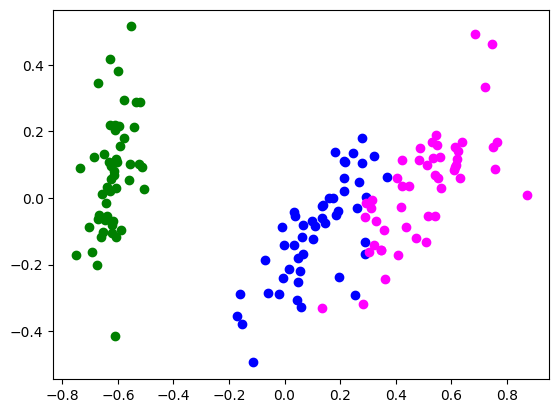

In [41]:
# Plot the principal components in 2D, mark different targets in color
plt.scatter(Xpca[y==0,0], Xpca[y==0,1],color = 'green')
plt.scatter(Xpca[y==1,0], Xpca[y==1,1],color = 'blue')
plt.scatter(Xpca[y==2,0], Xpca[y==2,1],color = 'magenta')

# KNN classifier

(105, 4)
(45, 4)
[[15  0  0]
 [ 0 12  1]
 [ 0  3 14]]


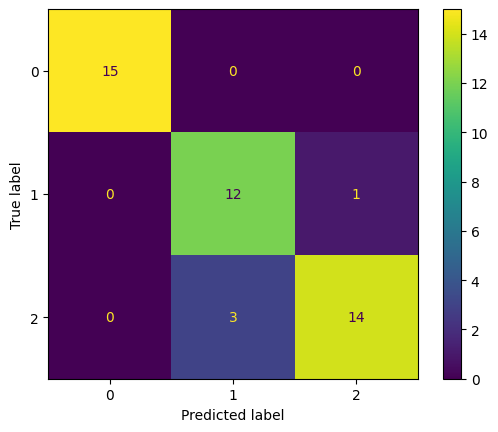

In [49]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpp,y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)

# Import and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

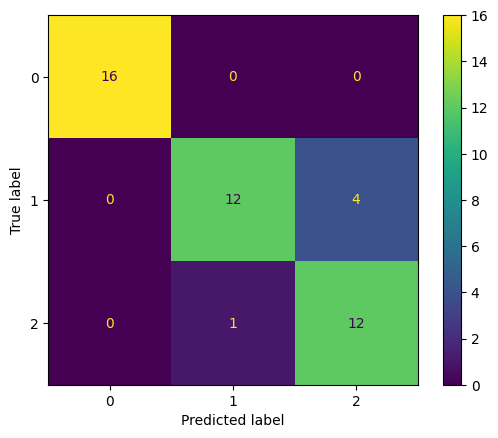

In [58]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
X_trainpca, X_testpca, y_trainpca, y_testpca = train_test_split(Xpca[:,0:2],y,test_size=0.3)
knnl=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_trainpca,y_trainpca)
Ypredpca=knn1.predict(X_testpca)

confusion_matrix(y_testpca,Ypredpca)
ConfusionMatrixDisplay.from_predictions(y_testpca,Ypredpca)
#print(Xpca[:,1:3])

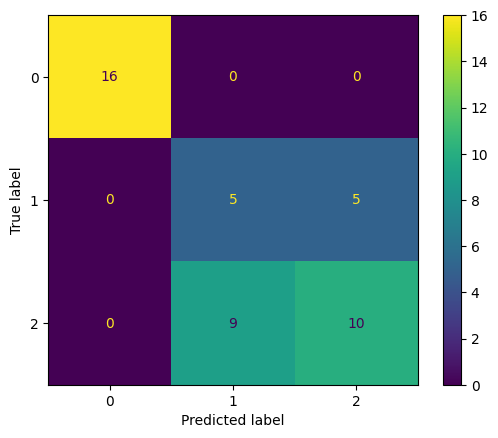

In [59]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
X_trainwrong, X_testwrong, y_trainwrong, y_testwrong = train_test_split(Xpp[:,0:2],y, test_size = 0.3)
knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_trainwrong,y_trainwrong)
Ypredwrong=knn1.predict(X_testwrong)

confusion_matrix(y_testwrong,Ypredwrong)
ConfusionMatrixDisplay.from_predictions(y_testwrong,Ypredwrong)